In [64]:
# For data manipulation
import pandas as pd

# for scientific computation
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import sklearn.metrics as sm

# for diagramming 
import matplotlib.pyplot as plt
import seaborn as sns

# For serialization and deserialization of data from/to file
import pickle

In [65]:
data = pd.read_csv("/Users/cej12/Skrivebord/Untitled Folder/data/house-data.csv")

In [66]:
# if you want to change the format, for example to avoid scientific notation, e.g. e+04
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [67]:
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.000,3,1.000,1180,5650,1.000,0,0,...,7,1180,0,1955,0,98178,47.511,-122.257,1340,5650
1,6414100192,20141209T000000,538000.000,3,2.250,2570,7242,2.000,0,0,...,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639
2,5631500400,20150225T000000,180000.000,2,1.000,770,10000,1.000,0,0,...,6,770,0,1933,0,98028,47.738,-122.233,2720,8062
3,2487200875,20141209T000000,604000.000,4,3.000,1960,5000,1.000,0,0,...,7,1050,910,1965,0,98136,47.521,-122.393,1360,5000
4,1954400510,20150218T000000,510000.000,3,2.000,1680,8080,1.000,0,0,...,8,1680,0,1987,0,98074,47.617,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.000,3,2.500,1530,1131,3.000,0,0,...,8,1530,0,2009,0,98103,47.699,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.000,4,2.500,2310,5813,2.000,0,0,...,8,2310,0,2014,0,98146,47.511,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.000,2,0.750,1020,1350,2.000,0,0,...,7,1020,0,2009,0,98144,47.594,-122.299,1020,2007
21611,291310100,20150116T000000,400000.000,3,2.500,1600,2388,2.000,0,0,...,8,1600,0,2004,0,98027,47.535,-122.069,1410,1287


dependent (y): price

independent (x): sqft_living  

In [68]:
X = data['sqft_living'].values.reshape(-1,1)
y = data['price'].values.reshape(-1,1)

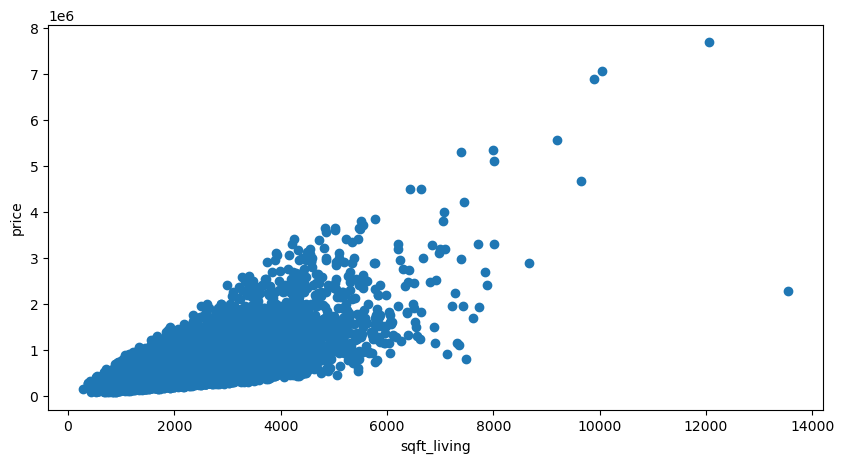

<Axes: xlabel='sqft_living', ylabel='price'>

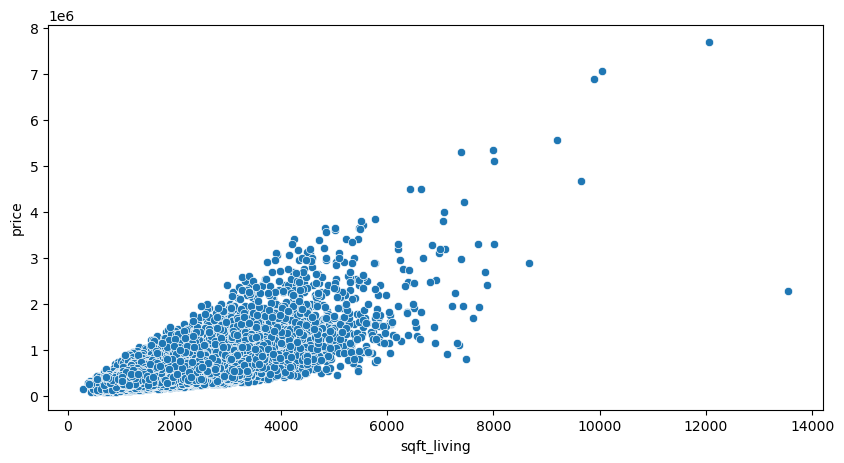

In [69]:
# plot all
plt.figure(figsize=(10,5))
plt.ylabel('price')
plt.xlabel('sqft_living')
plt.scatter(X, y)
plt.show()

# this seems nicer to use tbh.
plt.figure(figsize=(10,5))
sns.scatterplot(x='sqft_living', y='price', data=data)

In [70]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size=0.15) 

In [71]:
# creating an instance of Linear Regression model
myreg = LinearRegression()

In [72]:
# fit it to our data
myreg.fit(X_train, y_train)

LinearRegression()

In [73]:
# get the calculated coefficients
a = myreg.coef_
b = myreg.intercept_

In [74]:
a

array([[277.88028773]])

In [75]:
b

array([-38891.11523714])

In [76]:
y_predicted = myreg.predict(X_test)

In [77]:
test1 = myreg.predict([[4000]])
test1

array([[1072630.03569822]])

In [79]:
1072630.03568286

1072630.03568286

Text(0, 0.5, 'price')

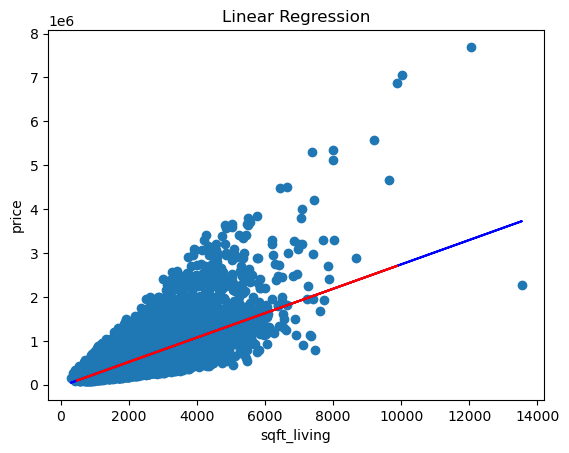

In [30]:
# Visualise the Linear Regression 
plt.title('Linear Regression')
plt.scatter(X, y)
plt.plot(X_train, (a*X_train) + b, color='blue')
plt.plot(X_test, y_predicted, color='red')
plt.xlabel('sqft_living')
plt.ylabel('price')

In [31]:
R2 = myreg.score(X, y)
R2

0.49279845827805924